# Lotka-Volterra Introduction

The Lotka-Volterra model is a basic dynamic model named after two biomathematicians, Alfred Lotka and Vito Volterra,
who developed the system of equations independent of each other in the first half of the twentieth century.
Lotka had developed the model to explain the dynamics of predator and prey populations, expanding on his previous model
of autocatalytic chemical reactions. Volterra had developed the system of equations to model the population of predator
fish in the Adriatic Sea.

The basic system consists of two linear ordinary differential equations (ODE). One equation represents the change in population of
the prey over time and is dependent on the population of the predator. The other equation represents the same but
for the predator population.

As an example, we let the prey be sheep and the predators be wolves.
If sheep were to exist without a predator and without a limitation of resources, the population would grow
exponentially:

> $ \frac{dx}{dt}=\alpha*x , $

where $\alpha$ is a constant rate of growth and $x$ is the number of sheep.

If wolves were added to the environment, then the sheep population would depend on how
often they met with the wolves. If there are more wolves, then there is more likelihood that they would meet sheep and
eat one. If there are more sheep, then they would have more likelihood of meeting wolves. If a wolf eats a sheep anytime
it finds one, then the death of the sheep is proportional to how many wolves there are. This relationship is the same
as the law of mass action: the rate of a chemical reaction is proportional to the concentration of the reactants.
In this case, the death of the sheep is then represented by a constant multiplied by the population of the sheep and the
population of the wolves. The sheep population equation is represented as:

> $ \frac{dx}{dt}=\alpha*x-\beta*x*y $

The equation for the population of the wolves is given as:

> $ \frac{dy}{dt} = \delta x y - \gamma  y, $

where $y$ is the wolf population, $\delta$ is the growth rate of the wolves that is proportional to number of sheep and
wolves and $\gamma$ is the mortality rate of the wolves.

There are many assumptions with this model and some are stated here:
- The sheep population grows exponentially without the presence of wolves.
- The wolves will always eat a sheep when it meets one.
- The wolves only eat sheep.

To see the interaction between the wolf and sheep populations, let $\alpha= 1.1, \beta = 0.4, \delta = 0.1$, and $\gamma = 0.4$.
If we then solve this system, assuming time is in weeks, with initial population of 10 thousand sheep
and 1 thousand wolves, the following plot shows the solutions on the interval [0,100] (100 weeks or a little under 2 years).

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.integrate import odeint as ode
from tabulate import tabulate

In [73]:
init_pop = [10,1] # initial population levels [prey, predator]

t_steps = 1000 # time steps
t_end = 100 # end of time interval
time = np.linspace(0, t_end, num=t_steps) # array to store time

alpha = 1.1 # prey birthrate
beta = 0.4 # prey death rate
delta = 0.1 # predator birthrate
gamma = 0.4 # predator death rate

k = 150 # prey carrying capacity
k_y = 100 # predator carrying capacity
# Array to track coefficients
coef = [alpha, beta, delta, gamma]

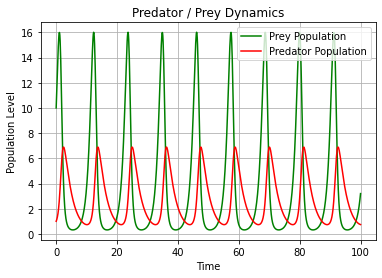

In [9]:
# Define the simulation function
def run_simu(tmp_pop, tmp_time, tmp_coef):

    tmp_x = tmp_pop[0] # Prey population value
    tmp_y = tmp_pop[1] # Predator population value

    tmp_alpha = tmp_coef[0]
    tmp_beta = tmp_coef[1]
    tmp_delta = tmp_coef[2]
    tmp_gamma = tmp_coef[3]

    dxdt = tmp_alpha * tmp_x - tmp_beta * tmp_x * tmp_y
    dydt = tmp_delta * tmp_x * tmp_y - tmp_gamma * tmp_y

    return[dxdt, dydt]

# Call the ode solver function
output = ode(run_simu, init_pop, time, args = (coef,))

plt.plot(time, output[:,0], color = "green", label = "Prey Population") # Prey output
plt.plot(time, output[:,1], color = "red", label = "Predator Population") # Prey output

plt.xlabel("Time")
plt.ylabel("Population Level (in thousands)")

plt.title("Predator / Prey Dynamics")
plt.legend()
plt.grid()

plt.show()

It makes sense that we see oscillations in the populations as seen in the plot because we have negative
feedback. As the predator population approaches its maximum, the prey population decreases rapidly. Then
after the predator population has decreased, the prey population begins to increase and eventually the predator population
will begin to increase again.

The steady state of the model is when there is equilibrium between the populations.

To find the steady state we need to find the equilibrium points.
In other words, we want to know when the rate of change (derivative) is equal to zero.

The not-so-meaningful solution is when the prey and the predator populations are zero.

The more meaningful solutions can be found as:

> $ \begin{align}
>0 &= \alpha  x - \beta x  y \\
>0 &= x ( \alpha - \beta  y ) \\
> y &= \frac{\alpha}{\beta} \text{ or }x = 0
> \end{align} $

> $ \begin{align}
>0 &= \delta x y - \gamma  y \\
>0 &= y ( \delta x - \gamma ) \\
> x &= \frac{\gamma}{\delta} \text{ or }y = 0
> \end{align} $

The non-zero equilibrium point for this system is $ (\frac{\gamma}{\delta}, \frac{\alpha}{\beta}) $

If we change our birth and death rate parameters to visualize this, we see that it is in fact an equilibrium state.

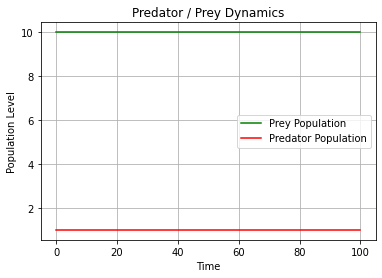

In [10]:
alpha_eq = 1.1 # prey birthrate
beta_eq = 1.1 # prey death rate
delta_eq = 0.4 # predator birthrate
gamma_eq = 4 # predator death rate

# Array to track coefficients
coef_eq = [alpha_eq, beta_eq, delta_eq, gamma_eq]

# Call the ode solver function
output_eq = ode(run_simu, init_pop, time, args = (coef_eq,))

plt.plot(time, output_eq[:,0], color = "green", label = "Prey Population") # Prey output
plt.plot(time, output_eq[:,1], color = "red", label = "Predator Population") # Prey output

plt.xlabel("Time")
plt.ylabel("Population Level (in thousands)")

plt.title("Predator / Prey Dynamics")
plt.legend()
plt.grid()

plt.show()


It would be interesting to see how the change in the parameters will change the dynamics of the populations.
To visualize this, we can make a phase space plot with varying parameter values.

In [70]:
def run_range_ode(lrange, urange, tmp_run_simu, tmp_init_pop, tmp_time, coef_base):

    output_range = [np.zeros((t_steps,2)), np.zeros((t_steps,2)),
                    np.zeros((t_steps,2)), np.zeros((t_steps,2)),
                    np.zeros((t_steps,2)), np.zeros((t_steps,2)),
                    np.zeros((t_steps,2)), np.zeros((t_steps,2))]

    idx = 0 # index to track output array storage

    for num in [0,1,2,3]:
    # for i in range(len(coef_base)):
        coef_new = coef_base[:]
        for j in [lrange,urange]:
            coef_new[num] = round(coef_base[num] + j, 2)
            output_temp = ode(tmp_run_simu, tmp_init_pop, tmp_time, args = (coef_new,))
            output_range[idx] = output_temp
            idx = idx + 1

    return output_range

output_vary = run_range_ode(-0.2, 0.2, run_simu, init_pop, time, coef)

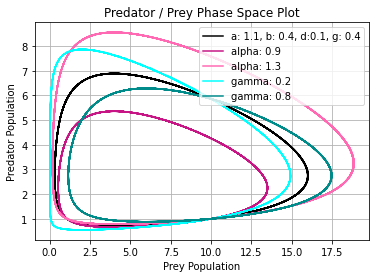

In [17]:
# original parameters
plt.plot(output[:,0], output[:,1], color = "black", label = "a: 1.1, b: 0.4, d:0.1, g: 0.4")

# alpha changes
plt.plot(output_vary[0][:,0], output_vary[0][:,1], color = "mediumvioletred", label = "alpha: 0.9")
plt.plot(output_vary[1][:,0], output_vary[1][:,1], color = "hotpink", label = "alpha: 1.3")

# beta changes
#plt.plot(output_vary[2][:,0], output_vary[2][:,1], color = "gold", label = "beta: 0.2")
#plt.plot(output_vary[3][:,0], output_vary[3][:,1], color = "goldenrod", label = "beta: 0.8")

# delta changes
#plt.plot(output_vary[4][:,0], output_vary[4][:,1], color = "springgreen", label = "delta: 0.05")
#plt.plot(output_vary[5][:,0], output_vary[5][:,1], color = "green", label = "delta: 0.2")

# gamma changes
plt.plot(output_vary[6][:,0], output_vary[6][:,1], color = "aqua", label = "gamma: 0.2")
plt.plot(output_vary[7][:,0], output_vary[7][:,1], color = "darkcyan", label = "gamma: 0.8")

#plt.plot(output)
plt.xlabel("Prey Population (in thousands)")
plt.ylabel("Predator Population (in thousands)")

plt.title("Predator / Prey Phase Space Plot")
plt.legend()
plt.grid()

plt.show()

The black line is the phase plot with the original parameters. It is a closed orbit that oscillates around the
fixed point $ (\frac{\gamma}{\delta}, \frac{\alpha}{\beta}) = (4, 2.75) $ (one of the equilibrium points).

When keeping all other parameters constant and changing only $\alpha$, the ellipse would stretch or shrink vertically.
Adjusting the values of only $\gamma$, the ellipse would stretch or shrink horizontally. This is because the closed
orbit oscillates around the fixed point and when we change $\gamma$, we change the x-value of the fixed point and when
we change $\alpha$ we change the y value.

These dynamics can be proven algebraically using concepts from linear algebra (calculating the eigenvalue and
eigenvector of the Jacobian matrix).


The assumption that the prey grow exponentially in the absence of predators is not realistic.
A more realistic approach is to assume there is a carrying capacity. When the sheep population is below the environmental
carrying capacity, the growth rate is large. When the sheep population is equal to it's carrying capacity, there is no
growth and when the sheep population is above the carrying capacity, there is negative growth.

Incorporating the carrying capacity into the model would alter the sheep population ODE:

> $ \frac{dx}{dt} = \alpha x (1-\frac{x}{K}), $

where $K$ is carrying capacity.

Now we need to add the predators to the environment:

> $ \frac{dx}{dt} = \alpha x (1-\frac{x}{K}) - \beta x  y $

And the predator equation remains the same:

>$ \frac{dy}{dt} = \delta x y - \gamma  y $
>

Using these updated ODEs, we can rerun our system and visualize the dynamics.

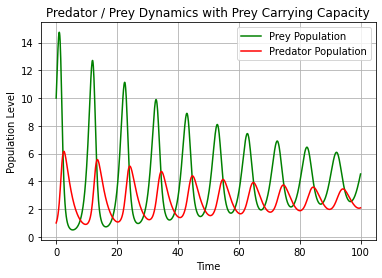

In [66]:
# Define the simulation function
def run_simu_carry_cap(tmp_pop, tmp_time, tmp_coef):

    tmp_x = tmp_pop[0] # Prey population value
    tmp_y = tmp_pop[1] # Predator population value

    tmp_alpha = tmp_coef[0]
    tmp_beta = tmp_coef[1]
    tmp_delta = tmp_coef[2]
    tmp_gamma = tmp_coef[3]

    dxdt = tmp_alpha * tmp_x * (1 - (tmp_x/k)) - tmp_beta * tmp_x * tmp_y
    dydt = tmp_delta * tmp_x * tmp_y - tmp_gamma * tmp_y
    #dxdt = tmp_alpha * x * (1 - ((x+tmp_beta*y)/k))
    #dydt = tmp_delta * x * y - tmp_gamma * y

    return[dxdt, dydt]

# Call the ode solver function
output_carry_cap = ode(run_simu_carry_cap, init_pop, time, args = (coef,))

plt.plot(time, output_carry_cap[:,0], color = "green", label = "Prey Population") # Prey output
plt.plot(time, output_carry_cap[:,1], color = "red", label = "Predator Population") # Prey output

plt.xlabel("Time")
plt.ylabel("Population Level (in thousands)")

plt.title("Predator / Prey Dynamics with Prey Carrying Capacity")
plt.legend()
plt.grid()

plt.show()

There is still an oscillation between the predator and prey populations, but the difference between the maximum and
minimum values is decreasing. The non-zero steady state of this system has changed. Previously, it was
$ (\frac{\gamma}{\delta}, \frac{\alpha}{\beta}) $, but now that has changed.

> $ \begin{align}
> 0 &= \alpha  x (1-\frac{x}{k}) - \beta x  y
>\end{align} $

substitute $x =\frac{\gamma}{\delta}$ and solve for $y$
> $ \begin{align}
> 0 &= \alpha  \frac{\gamma}{\delta} (1-\frac{\frac{\gamma}{\delta}}{k}) - \beta\frac{\gamma}{\delta}  y \\
> 0 &= \alpha (1-\frac{\gamma}{\delta k}) - \beta  y \\
> y &= \frac{\alpha}{\beta}(1-\frac{\gamma}{\delta k})  \\
> \end{align} $

The non-zero new steady state is $(\frac{\gamma}{\delta}, \frac{\alpha}{\beta}(1-\frac{\gamma}{\delta k}))$

With the narrowing of the prey and predator population, we know that our phase plot will spiral instead of have an
ellipse.

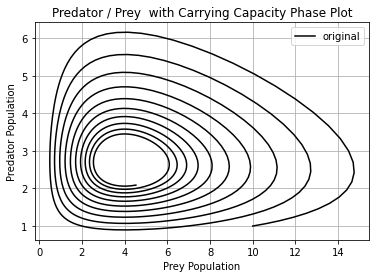

In [69]:
# original parameters
plt.plot(output_carry_cap[:,0], output_carry_cap[:,1], color = "black", label = "original")

#plt.plot(output)
plt.xlabel("Prey Population (in thousands)")
plt.ylabel("Predator Population (in thousands)")

plt.title("Predator / Prey  with Carrying Capacity Phase Plot")
plt.legend()
plt.grid()

plt.show()


To add stochastic behavior to our system, we can use an algorithm to randomly choose events
and event times from probability distributions.
We can use the Gillespie algorithm to do this.

We keep track of the population of the predator and prey. An event occurs when birth or death
occurs in either the prey or predator population. The propensity for each event to occur at a given
time is shown in the table below.

In [13]:
data = [['Prey + 1', 'alpha * x * (1 - x/k)'],
['Prey - 1', 'beta * x * y'],
['Predator + 1', 'delta * x * y'],
['Predator - 1','gamma * y']]

print(tabulate(data, headers=["Events", "Propensity"]))


Events        Propensity
------------  ---------------------
Prey + 1      alpha * x * (1 - x/k)
Prey - 1      beta * x * y
Predator + 1  delta * x * y
Predator - 1  gamma * y


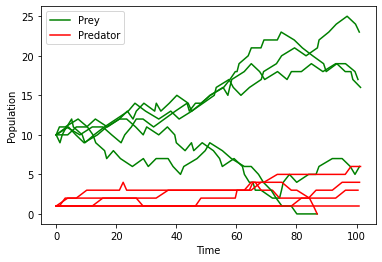

In [97]:
# Initial conditions
# Original init_pop = [10,1]. Too likely for prey/predator to die out with 10 and 1
x = [10] # track prey
y = [1] # track predator
t = [0] # to keep track of time
end = 100

x_all = [] # track results of prey from all model runs
y_all = [] # track results of predator from all model runs
t_all = []
# Keep same rates of coefficients as above
#alpha = 10 # prey birthrate
#beta = 0.1 # prey death rate
#delta = 0.3 # predator birthrate
#gamma = 30 # predator death rate

#k = 150
#k_y = 100
#r  = 0.05
#K = 100
for i in range(0,5): # simulate the model 100 times
    t = [0] # reset time to rerun
    x = [10] # reset time to rerun
    y = [1] # reset time to rerun
    i = i+1
    while t[-1] < end: # keep running until last item in t is after end
        #current_x = x[-1]
        props = [alpha * x[-1] * (1- x[-1]/k),
                      beta*x[-1]*y[-1],
                      delta*x[-1]*y[-1],
                      gamma * y[-1]]
        prop_sum = sum(props)
        #print("x: ", x[-1], "; y: ", y[-1])
        if prop_sum == 0: # can not divide by zero so break out of while loop
            break

        # choose next time increment randomly from exponential distribution with mean = 1/prop_sum
        #tau = np.random.exponential(scale=1/prop_sum)
        tau = np.random.uniform(0.5, 4.5)

        # add the randomly chosen tau to the current time
        t.append(t[-1]+tau)

        # randomly choose number to later weight with probability of events
        # to randomly choose which event that will occur at the next time point
        rand = random.uniform(0,1)

        if rand * prop_sum <= props[0]: # growth of prey
            x.append(x[-1] + 1)
            y.append(y[-1])
        elif rand * prop_sum > props[0] and rand * prop_sum <= props[0] + props[1]: # death of prey
            x.append(x[-1] - 1)
            y.append(y[-1])
        elif rand * prop_sum > props[0] and rand * prop_sum <= props[0] + props[1] + props[2]: # death of predator
            x.append(x[-1])
            y.append(y[-1] + 1)
        else:
            x.append(x[-1])
            y.append(y[-1] - 1)

    x_all.append(x)
    y_all.append(y)
    t_all.append(t)

# plot results
for i in range(len(x_all)):
    plt.plot(t_all[i],x_all[i], color = "green")
    plt.plot(t_all[i],y_all[i], color = "red")

plt.legend(['Prey', 'Predator'])
plt.xlabel("Time")
plt.ylabel("Population (in thousands)")
plt.show()

In the stochastic model, there are several simulations in which the predator and/or prey population become extinct.
This could be a more realistic situation, especially given that the original models showed the populations had fallen
to very low numbers and could likely become extinct.

If we change the predator-prey model dynamics such that the two species are competing for the same resource(s), then we
can use the competitive Lotka-Volterra Equations which are slightly different:

> $ \frac{dx}{dt} = \alpha x (1-\frac{x+\beta y}{K_x}) $
> $ \frac{dy}{dt} = \delta y (1-\frac{y+\gamma x}{K_y}) $
>
Same as before, $\alpha$ and $\delta$ represent the growth of x and y populations, respectively. $\beta$ and $\gamma$
are the effect that y has on x and x has on y, respectively. In this situation, both x and y populations have carrying
capacities.

This system (as with the others) is not restricted to two populations, it can be generalized to many more populations
interacting in the form:

> $ \frac{dx_i}{dt}=r_ix_i(1-\frac{\sum_{j=1}^{N} a_{ij}x_j}{K_i}) $,
>

where $r_i$ is the growth rate of $x_i$, N is the number of populations that interact with $x_i$ and $K_i$ is the
carrying capacity for $x_i$.